In [165]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [166]:
#import data
data = pd.read_csv("/content/Airlines+Data.csv")
data

,Month,Passengers
0,01/01/1995,112
1,02/01/1995,118
2,03/01/1995,132
3,04/01/1995,129
4,05/01/1995,121
...,...,...
91,02/04/1995,405
92,03/04/1995,355
93,04/04/1995,306
94,05/04/1995,271


## EDA

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       96 non-null     object
 1   Passengers  96 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [168]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [169]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

### Line plot

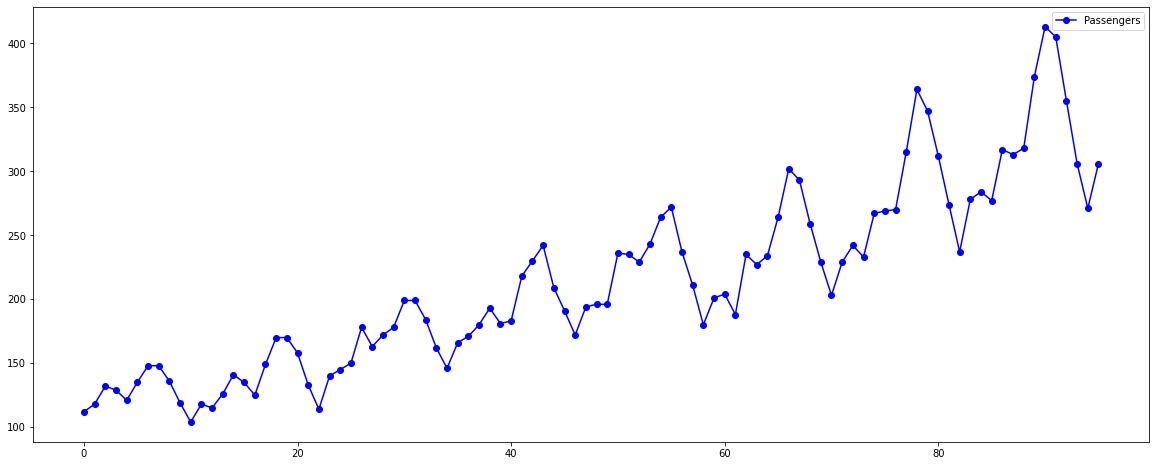

In [170]:
import matplotlib.pyplot as plt
data.plot(figsize=(20,8), color='b', marker='o')

In [171]:
data1 = pd.read_csv("/content/Airlines+Data.csv", header=0, index_col=0, parse_dates=True)
data1

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
1995-02-04,405
1995-03-04,355
1995-04-04,306


### Histogram & Densityb plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc8f2bbd070>]],
      dtype=object)

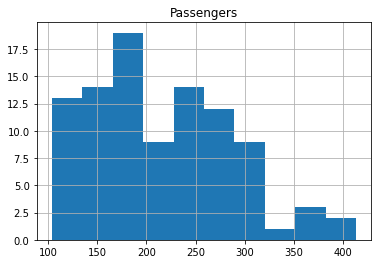

In [172]:
data1.hist()

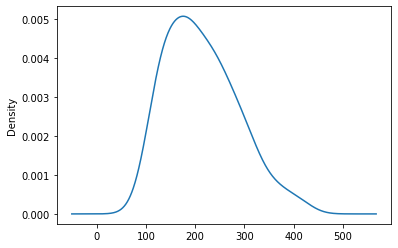

In [173]:
data.Passengers.plot(kind='kde')

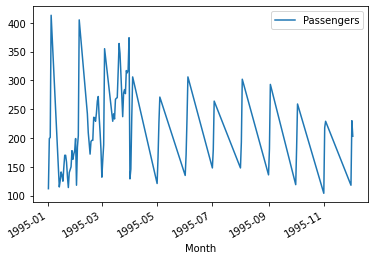

In [174]:
data1.plot()

### Lag plot

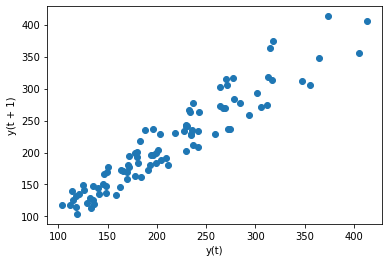

In [175]:
from pandas.plotting import lag_plot
lag_plot(data1)

### ACF plot

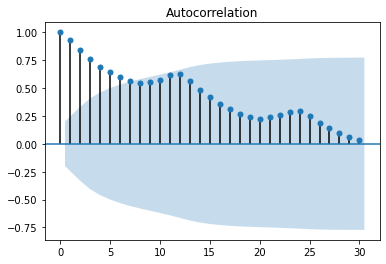

In [176]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data1,lags=30)
plt.show()

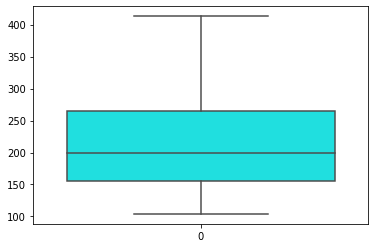

In [177]:
sns.boxplot(data=data['Passengers'], color='cyan')

In [178]:
# Boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x="Months",y="Passengers",data=data)

ValueError: ignored

<Figure size 576x432 with 0 Axes>

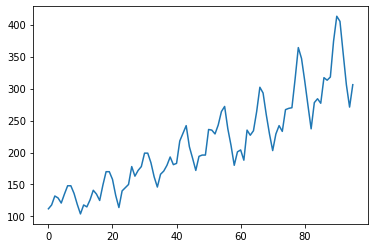

In [179]:
data.Passengers.plot()

<ipython-input-180-0083bd68db2e>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_ts_add=smf.tsa.seasonal_decompose(data["Passengers"],freq=11)


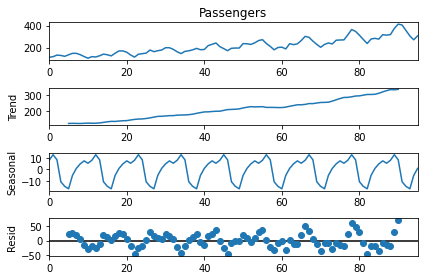

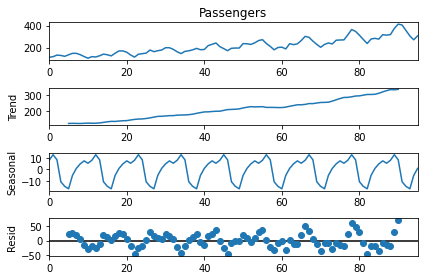

In [180]:
import statsmodels.api as smf
seasonal_ts_add=smf.tsa.seasonal_decompose(data["Passengers"],freq=11)
seasonal_ts_add.plot()

In [181]:
data['Month'] = pd.to_datetime(data['Month'])
data['Months'] = data['Month'].dt.strftime('%b')
data.head()

,Month,Passengers,Months
0,1995-01-01,112,Jan
1,1995-02-01,118,Feb
2,1995-03-01,132,Mar
3,1995-04-01,129,Apr
4,1995-05-01,121,May


In [182]:
month_dummies = pd.DataFrame(pd.get_dummies(data['Months']))
data1 = pd.concat([data,month_dummies], axis=1)
data1

,Month,Passengers,Months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,1995-02-04,405,Feb,0,0,0,1,0,0,0,0,0,0,0,0
92,1995-03-04,355,Mar,0,0,0,0,0,0,0,1,0,0,0,0
93,1995-04-04,306,Apr,1,0,0,0,0,0,0,0,0,0,0,0
94,1995-05-04,271,May,0,0,0,0,0,0,0,0,1,0,0,0


## Square and log transformation

In [183]:
data1["t"] = np.arange(1,97)
data1["t_squared"] = data1["t"]*data1["t"]
data1["log_Passengers"] = np.log(data1["Passengers"])

In [184]:
data1["t"]

0      1
1      2
2      3
3      4
4      5
      ..
91    92
92    93
93    94
94    95
95    96
Name: t, Length: 96, dtype: int64

In [185]:
data1["t_squared"]

0        1
1        4
2        9
3       16
4       25
      ... 
91    8464
92    8649
93    8836
94    9025
95    9216
Name: t_squared, Length: 96, dtype: int64

In [186]:
data1["log_Passengers"]

0     4.718499
1     4.770685
2     4.882802
3     4.859812
4     4.795791
        ...   
91    6.003887
92    5.872118
93    5.723585
94    5.602119
95    5.723585
Name: log_Passengers, Length: 96, dtype: float64

In [187]:
Train = data1.head(75)
Test = data1.tail(25)

In [188]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
print("RMSE Linear:", rmse_linear)

RMSE Linear: 51.83809749584509


In [189]:
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
print("RMSE Exponential: ",rmse_Exp)

RMSE Exponential:  42.77525975019796


In [190]:
Quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
print("RMSE Quadratic: ",rmse_Quad)

RMSE Quadratic:  54.03140645625269


In [191]:
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
print("RMSE Additive seasonality: ",rmse_add_sea)

RMSE Additive seasonality:  115.71743597554355


In [192]:
add_sea_Quad = smf.ols('Passengers~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
print("RMSE Additive Seasonality Quadratic:",rmse_add_sea_quad )

RMSE Additive Seasonality Quadratic: 55.08143191073248


In [193]:
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
print("RMSE Multiplicative Seasonality:",rmse_Mult_sea)

RMSE Multiplicative Seasonality: 119.99815760231131


In [194]:
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
print("RMSE Multiplicative Additive Seasonality:",rmse_Mult_add_sea )

RMSE Multiplicative Additive Seasonality: 47.65739359505403


In [195]:
data2 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),
        "RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data2)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,51.838097
1,rmse_Exp,42.775260
2,rmse_Quad,54.031406
3,rmse_add_sea,115.717436
4,rmse_add_sea_quad,55.081432
5,rmse_Mult_sea,119.998158
6,rmse_Mult_add_sea,47.657394


In [196]:
data3 = [['2003-01-01', 'Jan'], ['2003-02-01', 'Feb'], ['2003-03-01', 'Mar'],['2003-04-01', 'Apr'],['2003-5-01', 'May'],['2003-06-01', 'Jun'],
        ['2003-07-01', 'Jul'],['2003-08-01', 'Aug'],['2003-09-01', 'Sep'],['2003-10-01', 'Oct'],['2003-11-01', 'Nov'],['2003-12-01', 'Dec']]
forecast = pd.DataFrame(data3, columns = ['Date', 'Months'])
forecast

,Date,Months
0,2003-01-01,Jan
1,2003-02-01,Feb
2,2003-03-01,Mar
3,2003-04-01,Apr
4,2003-5-01,May
5,2003-06-01,Jun
6,2003-07-01,Jul
7,2003-08-01,Aug
8,2003-09-01,Sep
9,2003-10-01,Oct


In [197]:
dummies = pd.DataFrame(pd.get_dummies(forecast['Months']))
forecast1 = pd.concat([forecast,dummies],axis = 1)

forecast1["t"] = np.arange(1,13)   
forecast1["t_squared"] = forecast1["t"]*forecast1["t"] 
print("\nAfter Dummy, T and T-Square\n\n",forecast1.head())


After Dummy, T and T-Square

          Date Months  Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  \
0  2003-01-01    Jan    0    0    0    0    1    0    0    0    0    0    0   
1  2003-02-01    Feb    0    0    0    1    0    0    0    0    0    0    0   
2  2003-03-01    Mar    0    0    0    0    0    0    0    1    0    0    0   
3  2003-04-01    Apr    1    0    0    0    0    0    0    0    0    0    0   
4   2003-5-01    May    0    0    0    0    0    0    0    0    1    0    0   

   Sep  t  t_squared  
0    0  1          1  
1    0  2          4  
2    0  3          9  
3    0  4         16  
4    0  5         25  


In [198]:
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =data1).fit()
pred_new  = pd.Series(model_full.predict(forecast1))

forecast1["Forecasted_log"] = pd.Series(pred_new)
forecast1['Forecasted_Passengers'] = np.exp(forecast1['Forecasted_log'])

In [199]:
Final_predict = forecast1.loc[:, ['Date', 'Forecasted_Passengers']] 
Final_predict

,Date,Forecasted_Passengers
0,2003-01-01,118.202908
1,2003-02-01,123.221425
2,2003-03-01,117.463476
3,2003-04-01,114.602061
4,2003-5-01,112.003505
5,2003-06-01,120.455394
6,2003-07-01,135.899865
7,2003-08-01,145.472744
8,2003-09-01,137.046519
9,2003-10-01,126.261879
